# Understanding Customer Segmentation

According to marketing gurus, Philip Kotler and Gary Armstrong, customer segmentation is defined as “dividing a market into distinct groups of buyers who have distinct needs, characteristics, or behaviour and who might require separate products or marketing mixes” (Armstrong and Kotler, 2005: 54).

An except from the textbook Marketing Management (2012) explains,

To compete more effectively, many companies are now embracing target marketing. Instead of scattering their marketing
efforts, they’re focusing on those consumers they have the greatest chance of satisfying.
Effective target marketing requires that marketers:
1. Identify and profile distinct groups of buyers who differ in their needs and wants (market segmentation).
2. Select one or more market segments to enter (market targeting).
3. For each target segment, establish and communicate the distinctive benefit(s) of the company’s market offering
(market positioning).

In simpler words, as companies do not have infinite resources, they need to divide their customers into smaller segments or groups so that they can identify high potential segments and focus their attention on those segments. There are many ways to segment customers, for example by age groups, genders, geograpical locations, education levels, etc. One of the most popular and effective methods to segment customers is using RFM (Recency, Frequency, Monetary) analysis.

According to Chen et al. (2012), RFM (Recency, Frequency, Monetary) analysis is a behaviour-based approach of grouping customers into segments. It groups the customers on the basis of their previous purchase transactions i.e. how recently, how often, and how much did a customer buy. RFM segments customers into various groups or clusters and helps managers to identify more important / profitable segments to focus their attention and effort. It also helps marketers to identify customers who are more likely to respond to promotions and also for future personalization services.

Recency (R): Who have purchased recently? It means the number of days since last purchase (least recency is better)
Frequency (F): Who have purchased frequently? It means the total number of purchases. (high frequency is better)
Monetary (M): Who have high purchase amount? It means the total money customer spent (high monetary is better)

RFM analysis is based on the Pareto principle that 80% of your business comes from 20% of your customers. The 3-dimensional approach provides a more holistic view on segmentation compared to the traditional single dimension approach which often segment customers based on sales value or volume only. For example, there may be a segment of customers who is the big spender (in terms of sales value) but what if they only purchase once or twice a year? Or they may be a customer segment who purchase frequently but what if the value is very small? Are they worth the marketers' time and effort? RFM analysis helps to overcome these shortcomings by providing a more holistic and effective approach to customer segmentation.

# Import Libraries and Load Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import datetime as dt
import scipy.stats
import statsmodels.formula.api as sm

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [3]:
commerce = pd.read_csv("Ecommerce.csv", encoding='unicode_escape')

In [4]:
commerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [5]:
commerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   Unnamed: 8   0 non-null       float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


In [6]:
commerce.describe(include="all")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909,0.0
unique,25900,4070,4223,NaN,305,NaN,NaN,38,NaN
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,3-Dec-17,NaN,NaN,United Kingdom,NaN
freq,1114,2313,2369,NaN,5331,NaN,NaN,495478,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN,NaN


In [7]:
commerce = commerce.drop(columns = "Unnamed: 8")
commerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


In [8]:
df = commerce.copy()

# Handle with Missing Values

The columns that are required for RFM analysis are InvoiceNo, Quantity, InvoiceDate, UnitPrice and CustomerID. We need to make sure there are no missing values in these columns or that they are treated prior to the analysis.

In [9]:
# check for missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Note: The are 135,080 missing values for the column CustomerID which is important for RFM analysis. In this case, there is not much we can do as CustomerIDs are unique values, it does not make sense to impute the missing values with calculated values. So, we will only work with the portion of the dataframe with no missing values

In [10]:
# select the portion of dataframe with no missing values for the column "CustomerID"
df = df[pd.notnull(df["CustomerID"])]
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


Note: The are 406,829 rows with no missing values

# Remove Duplicate Values

We can check for any duplicate values in the dataframe using function .duplicated() and remove them accordingly using function drop_duplicates().

In [12]:
print("There are {} duplicated values.".format(df.duplicated().sum()))
df[df.duplicated(keep=False)].head(10)

There are 5226 duplicated values.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,29-Nov-16,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,29-Nov-16,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,29-Nov-16,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,29-Nov-16,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,29-Nov-16,2.95,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,29-Nov-16,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,29-Nov-16,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,29-Nov-16,4.95,17908.0,United Kingdom
548,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,29-Nov-16,2.95,17920.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,29-Nov-16,2.95,17920.0,United Kingdom


Note: From the table above, we can see that item 485 and 539 are duplicates, item 489 and 527 are duplicates and so on... The duplicated values need to be removed. We will use .drop_duplicates() function to drop duplicates except for the first occurrence.

In [13]:
data = df.drop_duplicates()
# check for duplicates after removing duplicates
data.duplicated().sum()

0

Note: There are no more duplicate values

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401603 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401603 non-null  object 
 1   StockCode    401603 non-null  object 
 2   Description  401603 non-null  object 
 3   Quantity     401603 non-null  int64  
 4   InvoiceDate  401603 non-null  object 
 5   UnitPrice    401603 non-null  float64
 6   CustomerID   401603 non-null  float64
 7   Country      401603 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


Note: Now the filtered data is left with 401,604 rows which is the result of 406,829 minus 5,225 duplicates

In [15]:
data.Country.replace(["Unspecified", "EIRE", "RSA", "USA"], ["United Kingdom", "Ireland", "Republic of South Africa", "United States of America"], inplace = True)
data.Country.value_counts().head()

C:\Users\ERDEM\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


United Kingdom    356968
Germany             9480
France              8475
Ireland             7475
Spain               2528
Name: Country, dtype: int64

# Data Exploration

Since the data is from an online retailer, we will look at where their customers originate from i.e. countries

In [16]:
# filter customers by top 10 countries in percentage
data.Country.value_counts(normalize=True)[:10]

United Kingdom    0.888858
Germany           0.023605
France            0.021103
Ireland           0.018613
Spain             0.006295
Netherlands       0.005904
Belgium           0.005152
Switzerland       0.004674
Portugal          0.003663
Australia         0.003132
Name: Country, dtype: float64

Note: United Kingdom alone accounts for 88.8% of all countries

<AxesSubplot:>

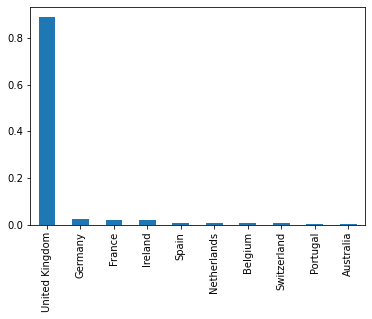

In [17]:
# visualize in bar chart
data.Country.value_counts(normalize=True)[:10].plot(kind="bar")

Note: We can filter and only select customers from United Kingdom, which are considered as "local customers" for the online retailer since the online retailer is UK-based. This will serves as a good starting point for our analysis and also for the online retailer to focus their marketing effort

In [18]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,401603.000000,401603.000000,401603.000000
mean,12.183298,3.474067,15281.162093
std,250.283348,69.764122,1714.008032
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


Note: From the summary statistics above, we notice that the minimum value for Quantity is strangely negative -80995 which does not make sense. Upon careful study of the data description from UCI Machine Learning Repository website where this dataset is obtained, it is discovered that some transaction records in this dataset are "cancellations". This can be noticed from the column InvoiceNo which is a 6-digit integral number uniquely assigned to each transaction. But it is stored as "Object" instead of "Integer", this is because some of the InvoiceNo starts with letter 'C', which indicates a cancellation.

In [19]:
# showing cancelled transactions
data[data["InvoiceNo"].str.startswith("C", na=False)].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,29-Nov-16,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,29-Nov-16,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,29-Nov-16,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,29-Nov-16,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,29-Nov-16,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,29-Nov-16,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,29-Nov-16,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,29-Nov-16,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,29-Nov-16,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,29-Nov-16,4.25,17897.0,United Kingdom


Note: From the cancellation cases above, the InvoiceNo starts with "C" and the Quantity is negative value

In [20]:
processed_data = data.drop(["StockCode", "Description"], axis=1)
processed_data.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,6,29-Nov-16,3.39,17850.0,United Kingdom


# RFM Analysis

As mentioned earlier, we only need five columns from the raw data i.e. CustomerID, InvoiceDate, InvoiceNo, Quantity, and UnitPrice.

CustomerId will uniquely define our customers
InvoiceDate help us calculate recency of purchase (Recency)
InvoiceNo helps us to count the number of time transaction performed (Frequency)
Quantity purchased in each transaction and UnitPrice of each unit will help to calculate the total purchased amount (Monetary)

## Recency
To calculate Recency, we calculate the number of days between present date (i.e. Today) and date of last purchase of each customer. We first define today's date and then get the .max() function of InvoiceDate to calculate the number of days between today and date of last purchase.

In [21]:
processed_data['InvoiceDate'] = pd.to_datetime(processed_data['InvoiceDate'])
commer = commerce.sort_values(by=['CustomerID', 'InvoiceDate'], ascending=[True, False])
commer = commerce.drop_duplicates(subset='CustomerID', keep='first')
commer = commerce.sort_values(by='InvoiceDate', ascending=False)
commer['InvoiceDate'] = commer['InvoiceDate'].astype(str)
# First, split the InvoiceDate column into multiple rows, one for each comma-separated value
commer = commer.set_index('CustomerID')['InvoiceDate'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).reset_index(name='InvoiceDate')

# Convert the InvoiceDate column to datetime
commer['InvoiceDate'] = pd.to_datetime(commer['InvoiceDate'])

# Group the data by customer_id and keep only the row with the maximum InvoiceDate
commer = commer.groupby('CustomerID').max().reset_index()
commer.sample(10)

,CustomerID,InvoiceDate
4168,18009.0,2017-04-16
3705,17382.0,2017-10-03
562,13079.0,2017-12-03
1919,14952.0,2017-10-22
2729,16038.0,2017-11-30
412,12866.0,2017-02-27
11,12358.0,2017-12-06
1947,14995.0,2017-10-30
4001,17775.0,2017-03-28
1781,14754.0,2017-10-24


In [29]:
commer["Recency"] = commer['InvoiceDate'].max() - commer['InvoiceDate']
commer['Recency'] = commer['Recency'].astype(str)
commer['Recency'] = commer['Recency'].str.split(" ").str[0].astype(int)
commer.head()

,CustomerID,InvoiceDate,Recency
0,12346.0,2017-01-16,325
1,12347.0,2017-12-05,2
2,12348.0,2017-09-23,75
3,12349.0,2017-11-19,18
4,12350.0,2017-01-31,310


## Frequency

To calculate Frequency, we calculate the number of purchases for each customer.

In [38]:
frequency = processed_data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency = frequency.rename(columns = {"InvoiceNo" : "Frequency"})
frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


## Monetary
To calculate Monetary, we calculate the sum of purchase price for each customer. To do this, we create a new column `TotalPrice` which is the product of `Quantity` purchased in each transaction and `UnitPrice` of each unit

In [39]:
processed_data["TotalPrice"] = processed_data["Quantity"] * processed_data["UnitPrice"]
monetary = processed_data.groupby("CustomerID")["TotalPrice"].max().reset_index()
monetary = monetary.rename(columns = {"TotalPrice" : "Monetary"})
monetary.head()

,CustomerID,Monetary
0,12346.0,77183.6
1,12347.0,249.6
2,12348.0,240.0
3,12349.0,300.0
4,12350.0,40.0


In [45]:
RFM = pd.concat([commer[["Recency"]], frequency[["Frequency"]], monetary[["Monetary"]]], axis = 1)
RFM.index = monetary["CustomerID"].values
RFM

,Recency,Frequency,Monetary
12346.0,325,2,77183.60
12347.0,2,7,249.60
12348.0,75,4,240.00
12349.0,18,1,300.00
12350.0,310,1,40.00
...,...,...,...
18280.0,277,1,23.70
18281.0,180,1,16.95
18282.0,7,3,25.50
18283.0,3,16,20.80


# Model: RFM scoring + K-Means clustering

In this approach we used RFM scoring(assigned RFM score) and K-means clustering.

## Transformation of variables:

The next step is to transform all three variables. The RFM method requires ordinal variables and this can be done in several ways, we will use the percentiles of the distribution of the given variable. Scaling is not required.

The labels will be values 1-4. When labeling the values of variables, it is important to remember that the higher label should mean the better situation of the person from the point of view of the seller. In the case of "Recency" - the smaller value of the variable, the higher label (we prefer clients who are active). In the case of "Frequency" - the greater value of the variable, the higher label (we prefer customers who buy more often and for large amounts).

In [54]:
rec = pd.qcut(RFM["Recency"], 4, ["1","2","3","4"])
freq = pd.qcut(RFM["Frequency"], 4, ["3","2","1"], duplicates="drop")
mon = pd.qcut(RFM["Monetary"], 4, ["4","3","2","1"])
RFM_cutted = pd.DataFrame({'Recency' : rec, 'Frequency' : freq, 'Monetary' : mon})
RFM_cutted

,Recency,Frequency,Monetary
12346.0,4,3,1
12347.0,1,1,1
12348.0,3,2,1
12349.0,2,3,1
12350.0,4,3,3
...,...,...,...
18280.0,4,3,4
18281.0,4,3,4
18282.0,1,3,4
18283.0,1,1,4


In [55]:
RFM_cutted_values = RFM_cutted.values

## K-Means clustering model
K-means is an unsupervised machine learning algorithm, which is used for data clustering. In k-means algorithm number of clusters K is predetermined and the algorithm iteratively assigns each data point to one of the K clusters based on the feature similarity.

We will find the optimal number of clusters using the elbow method:

In [56]:
group = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(RFM_cutted_values)
    group.append([i, kmeans.inertia_])
groups = pd.DataFrame(group, columns = ['number_of_group', 'inertia'])
groups

,number_of_group,inertia
0,1,14128.676807
1,2,8413.791943
2,3,5907.923357
3,4,4203.020400
4,5,3517.851319
5,6,2974.487948
6,7,2720.685916
7,8,2376.804225
8,9,2135.715435
9,10,2055.725092


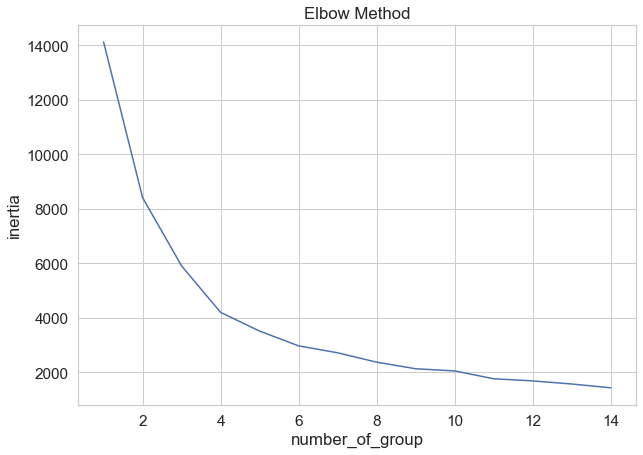

In [57]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4, style="whitegrid")
sns.lineplot(data = groups, x = 'number_of_group', y = 'inertia').set(title = "Elbow Method")
plt.show()

In [58]:
def plots_model():    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    for x in RFM.groups.unique():        
        xs = RFM[RFM.groups == x]['Recency']
        zs = RFM[RFM.groups == x]['Frequency']
        ys = RFM[RFM.groups == x]['Monetary']
        ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', label = x)

    ax.set_xlabel('Recency')
    ax.set_zlabel('Frequency')
    ax.set_ylabel('Monetary')
    plt.title('Visualization of created groups')
    plt.legend()
    plt.show()

In [107]:
model_1 = KMeans(n_clusters=6, init='k-means++', max_iter=3000)
groups = model_1.fit_predict(RFM_cutted_values)
RFM['groups'] = groups

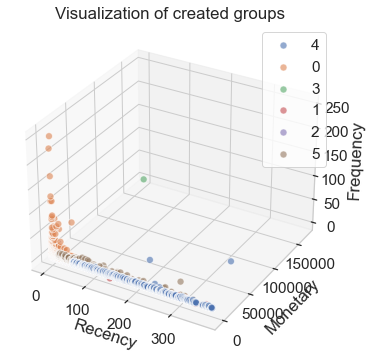

In [115]:
plots_model()

Distribution of the size of individual groups:

In [144]:
RFM.groupby('groups').agg(['mean'])

,Recency,Frequency,Monetary
,mean,mean,mean
groups,,,
0,12.223881,14.583238,239.470023
1,183.754937,1.587971,22.029479
2,22.331234,2.706549,32.209824
3,23.429158,2.977413,531.142854
4,166.911493,2.105680,332.816129
5,84.670487,7.237822,115.480401


The sum of the values for each group:

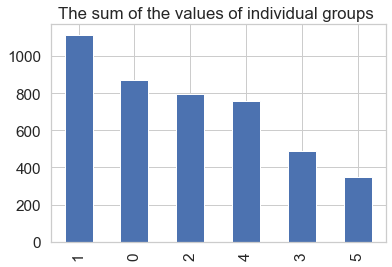

In [145]:
RFM.groups.value_counts().plot(kind='bar', figsize=(6,4), title='The sum of the values of individual groups ');

Our valued customers are:

In [150]:
valued_customers = RFM[RFM["groups"] == 0].drop("groups", axis=1)

In [151]:
valued_customers.describe()

,Recency,Frequency,Monetary
count,871.000000,871.000000,871.000000
mean,12.223881,14.583238,239.470023
std,11.292523,17.407282,559.091050
min,0.000000,4.000000,33.150000
25%,3.000000,7.000000,66.000000
50%,9.000000,10.000000,102.000000
75%,17.000000,16.000000,209.400000
max,50.000000,248.000000,8142.750000


Our the VIP Clients are(filtering, using the 75% of the recency, and 25% of the frequency and monetary of group 0):

In [159]:
VIP_Clients = RFM[(RFM["groups"] == 0) & (RFM["Recency"] < 17) & (RFM["Frequency"] > 16) & (RFM["Monetary"] > 209)]

In [160]:
VIP_Clients

,Recency,Frequency,Monetary,groups
12471.0,2,49,876.00,0
12621.0,1,23,350.40,0
12681.0,14,27,214.80,0
12682.0,3,31,386.64,0
12709.0,3,26,350.40,0
...,...,...,...,...
18102.0,0,62,3828.00,0
18109.0,1,31,240.90,0
18172.0,14,25,326.40,0
18198.0,4,21,305.28,0


#### Explanation: 
These VIP clients are constantly shopping with us, spending large sums of money, and it has not been long since their last purchase.

#### Marketing strategy:
We can apply a typical promotional strategy would focus certain efforts for the high value customers. For the best customers example actions may it be: special offers with discounts, customer cards entitling to benefits (e.g. collecting points redeemed for rewards) or a gift for the next order.